In [62]:
from sklearn.cluster import AffinityPropagation
import os
import re
import sys
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
import traceback
import numpy as np
import matplotlib.pyplot as plt
from rouge import Rouge 
%matplotlib notebook

In [74]:
all_path = "/Users/zhouyou/Downloads/summ/"
swr_path = "/Users/zhouyou/Downloads/swr_data/"

In [64]:
hypothesis = "the #### transcript is a written version of each day 's cnn student news program use this transcript to help students with reading comprehension and vocabulary use the weekly newsquiz to test your knowledge of storie s you saw on cnn student news"

reference = "this page includes the show transcript use the transcript to help students with reading comprehension and vocabulary at the bottom of the page , comment for a chance to be mentioned on cnn student news . you must be a teacher or a student age # # or older to request a mention on the cnn student news roll call.\n the weekly newsquiz tests students' knowledge of even ts in the news"
test = "this page includes the show transcript use the transcript to help students with reading comprehension and vocabulary at the bottom of the page"

rouge = Rouge()
scores = rouge.get_scores(test, reference)
print(scores[0]["rouge-1"])

{'f': 0.5454545414876033, 'p': 1.0, 'r': 0.375}


In [65]:
# 读文本
def readfile(path):
    # 遍历文件夹
    files = os.listdir(path)
    files.sort()
    for file in files:
        raw_text = ''
        raw_text_list = []
        if not os.path.isdir(file):
            # print("File name: " + file)
            f = open(path + "/" + file)
            for line in f.readlines():
                searchObj = re.findall(r'SNO=(.*?)>(.*?)</S>', line)
                if searchObj:
                    # print(searchObj)
                    # print(searchObj[0][0])
                    if searchObj[0][0] == "\"1\"":
                        raw_text = raw_text + searchObj[0][1] + '.' + ' '
                        raw_text_list.append(searchObj[0][1])
                    else:
                        raw_text = raw_text + searchObj[0][1] + ' '
                        raw_text_list.append(searchObj[0][1])
                    # print(s)
            yield file, raw_text, raw_text_list

In [115]:
per_raw_text = readfile(all_path + "2/docsent")

all_raw_text = []
all_filenames = []
all_raw_text_list = []

for filename, raw_text, raw_text_list in per_raw_text:
    all_filenames.append(filename)
    all_raw_text.append(raw_text)
    all_raw_text_list.append(raw_text_list)

In [116]:
rouge = Rouge()

In [135]:
sent = all_raw_text[0]
# print(sent)
# print(all_raw_text_list)

# print(all_raw_text_list[4])

summ = all_raw_text_list[0][4] + all_raw_text_list[0][5]

scores = rouge.get_scores(summ, all_raw_text[0])
print(scores)

[{'rouge-1': {'f': 0.25906735525785934, 'p': 1.0, 'r': 0.1488095238095238}, 'rouge-2': {'f': 0.1789137363900826, 'p': 1.0, 'r': 0.09824561403508772}, 'rouge-l': {'f': 0.15160522124412495, 'p': 1.0, 'r': 0.1488095238095238}}]


In [117]:
res = []
for i in range(len(all_filenames)):
    filename = all_filenames[i]
    searchObj = re.findall(r'-(.*)_', filename)
    extract_folder_name = searchObj[0][:-2]
    file = filename[2:-7]

    archive_files = os.listdir(all_path + "2/extract/")
    archive_files.sort()

    temp = []

    for archive_file in archive_files:
        path = all_path + "2/extract/" + archive_file + "/extract/" + extract_folder_name
        try:
            # print("File name: " + file)
            # print(path + "/" + file + "extract")
            f = open(path + "/" + file + "extract")
            summ = ''
            for line in f.readlines():
                # print(line)
                searchObj = re.findall(r'SNO="(.*)"', line)
                if searchObj:
                    # print(int(searchObj[0]))
                    doc_select_list = all_raw_text_list[i]
                    summ = summ + (doc_select_list[int(searchObj[0]) - 1])
            
            scores = rouge.get_scores(summ, all_raw_text[i])
            res.append(scores[0]["rouge-1"]["r"])
        except Exception as e:
            print(e)
            
    

[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199708/19970814_001.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199709/19970905_004.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199710/19971020_001.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199710/19971021_002.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199711/19971125_002.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199803/19980309_005.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199805/19980527_009.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199806/19980614_007.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/su

In [118]:
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
count = 0
for i in res:
    if count%8 == 0:
        y0.append(i)
    if count%8 == 1:
        y1.append(i)
    if count%8 == 2:
        y2.append(i)
    if count%8 == 3:
        y3.append(i)
    if count%8 == 4:
        y4.append(i)
    if count%8 == 5:
        y5.append(i)
    if count%8 == 6:
        y6.append(i)
    if count%8 == 7:
        y7.append(i)
    count = count + 1
        
    

In [119]:
import numpy as np
def split_y(y):
#     print(y0)
    temp1 = []
    temp2 = []
    temp3 = []
    temp4 = []
    temp5 = []
    temp6 = []
    temp7 = []
    temp8 = []
    temp9 = []
    temp10 = []
    count = 0
    for i in y:
        if count%10 == 0:
            temp1.append(i)
        if count%10 == 1:
            temp2.append(i)
        if count%10 == 2:
            temp3.append(i)
        if count%10 == 3:
            temp4.append(i)
        if count%10 == 4:
            temp5.append(i)
        if count%10 == 5:
            temp6.append(i)
        if count%10 == 6:
            temp7.append(i)
        if count%10 == 7:
            temp8.append(i)
        if count%10 == 8:
            temp9.append(i)
        if count%10 == 9:
            temp10.append(i)
        count = count + 1

        
    return [np.mean(temp1),np.mean(temp2),np.mean(temp3),np.mean(temp4),np.mean(temp5),np.mean(temp6)
           ,np.mean(temp7),np.mean(temp8),np.mean(temp9),np.mean(temp10)]
    

In [120]:
# SWR的数据
def getSWR(dirName):
    file_dirs = os.listdir(swr_path)
    file_dirs.sort()
    res=[]
    for i in file_dirs:
        if os.path.isdir(swr_path + i):
            files = os.listdir(swr_path + i)
            files.sort()
            temp = []
            for file in files:
                if str(file).find(dirName)==0:
                    f = open(swr_path + i + "/" + file)
                    text_content = ""
                    for line in f.readlines():
                        if line != "\n":
                            text_content = text_content + line
                    text_content = text_content.replace("\n", "")
                    temp.append(text_content)
            res.append(temp)
                    
    return res
                
        

In [121]:
def solve_swrresult(swrresult, k):
    res = []
#     print(swrresult)
    for i in swrresult:
        res.append(i[k])
    return res

In [122]:
res = getSWR("2__")

In [123]:
sol = solve_swrresult(res, 0)

In [124]:
swr = []
for i in range(10):
    sol = solve_swrresult(res, i)
    select_text = all_raw_text[i]
    temp = []
    for j in sol:
        scores = rouge.get_scores(j, select_text)
        temp.append(scores[0]["rouge-1"]["r"])
    swr.append(temp)
        

In [125]:
print(len(swr))

10


In [126]:
print(swr[0])

[0.2261904761904762, 0.47023809523809523, 0.5773809523809523, 0.6726190476190477, 0.7619047619047619, 0.8452380952380952, 0.8809523809523809, 0.9166666666666666, 0.9761904761904762]


In [127]:
x0swr = []
x1swr = []
x2swr = []
x3swr = []
x4swr = []
x5swr = []
x6swr = []
x7swr = []
x8swr = []

for i in swr:
    x0swr.append(i[0])
    x1swr.append(i[1])
    x2swr.append(i[2])
    x3swr.append(i[3])
    x4swr.append(i[4])
    x5swr.append(i[5])
    x6swr.append(i[6])
    x7swr.append(i[7])
    x8swr.append(i[8])
    

swr_res = [np.mean(x0swr),np.mean(x1swr),np.mean(x2swr),np.mean(x3swr),np.mean(x4swr),np.mean(x5swr),
          np.mean(x6swr),np.mean(x7swr),np.mean(x8swr)]
    
    

<IPython.core.display.Javascript object>


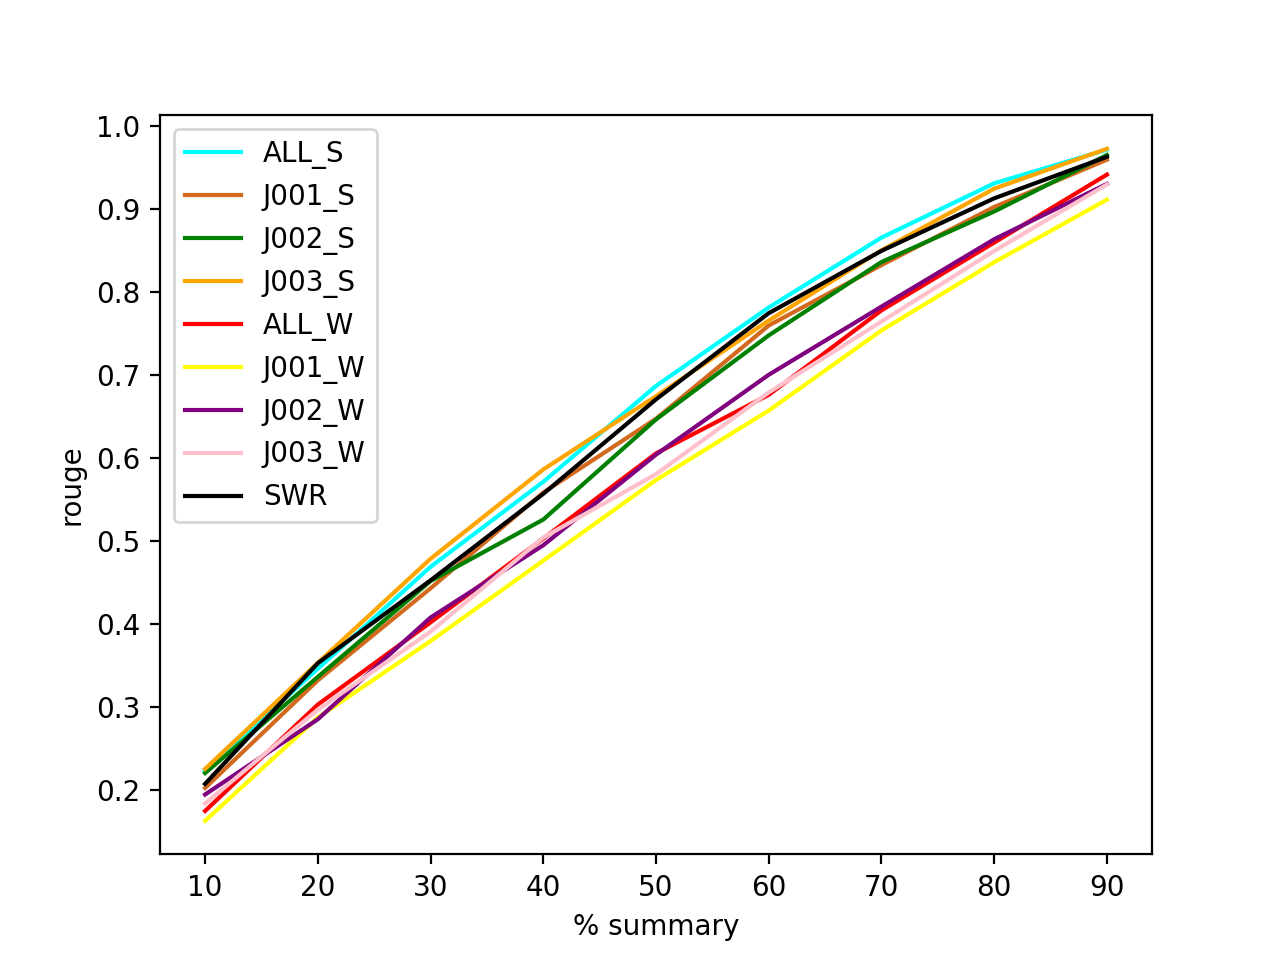

In [128]:
%matplotlib notebook
x=[10,20,30,40,50,60,70,80,90]
plt.figure()
plt.plot(x, split_y(y0)[1:], label ="ALL_S", color="#00FFFF")
plt.plot(x, split_y(y1)[1:], label ="J001_S", color="#D2691E")
plt.plot(x, split_y(y2)[1:], label ="J002_S", color="#008000")
plt.plot(x, split_y(y3)[1:], label ="J003_S", color="#FFA500")
plt.plot(x, split_y(y4)[1:], label ="ALL_W", color="#FF0000")
plt.plot(x, split_y(y5)[1:], label ="J001_W", color="#FFFF00")
plt.plot(x, split_y(y6)[1:], label ="J002_W", color="#800080")
plt.plot(x, split_y(y7)[1:], label ="J003_W", color="#FFC0CB")
plt.plot(x, swr_res, label ="SWR", color="#000000")
plt.xlabel("% summary")
plt.ylabel("rouge")
plt.legend() 

In [112]:
#TODO: judge2是否倾向于选长句
tokenizer = RegexpTokenizer(r'\w+')
res = []
for i in range(len(all_filenames)):
    filename = all_filenames[i]
    searchObj = re.findall(r'-(.*)_', filename)
    extract_folder_name = searchObj[0][:-2]
    file = filename[2:-7]

    archive_files = os.listdir(all_path + "2/extract/")
    archive_files.sort()

    temp = []

    for archive_file in archive_files:
        path = all_path + "2/extract/" + archive_file + "/extract/" + extract_folder_name
        try:
            # print("File name: " + file)
            # print(path + "/" + file + "extract")
            f = open(path + "/" + file + "extract")
#             print(str(path + "/" + file + "extract"))
            summ = 0
            for line in f.readlines():
                # print(line)
                searchObj = re.findall(r'SNO="(.*)"', line)
                if searchObj:
                    # print(int(searchObj[0]))
                    doc_select_list = all_raw_text_list[i]
#                     summ = summ + (doc_select_list[int(searchObj[0]) - 1])
#                     print(doc_select_list[int(searchObj[0]) - 1])
#                     print(len(doc_select_list[int(searchObj[0]) - 1]))
                    sent = doc_select_list[int(searchObj[0]) - 1]
                    tokens = tokenizer.tokenize(sent)
#                     print(len(tokens))
                    summ = summ + len(tokens)
#             print(summ)
            res.append(summ)
        except Exception as e:
            print(e)
            


[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199708/19970814_001.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199709/19970905_004.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199710/19971020_001.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199710/19971021_002.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199711/19971125_002.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199803/19980309_005.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199805/19980527_009.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/summ/2/extract/.DS_Store/extract/199806/19980614_007.e.extract'
[Errno 20] Not a directory: '/Users/zhouyou/Downloads/su

In [113]:
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
count = 0
for i in res:
    if count%8 == 0:
        y0.append(i)
    if count%8 == 1:
        y1.append(i)
    if count%8 == 2:
        y2.append(i)
    if count%8 == 3:
        y3.append(i)
    if count%8 == 4:
        y4.append(i)
    if count%8 == 5:
        y5.append(i)
    if count%8 == 6:
        y6.append(i)
    if count%8 == 7:
        y7.append(i)
    count = count + 1

<IPython.core.display.Javascript object>


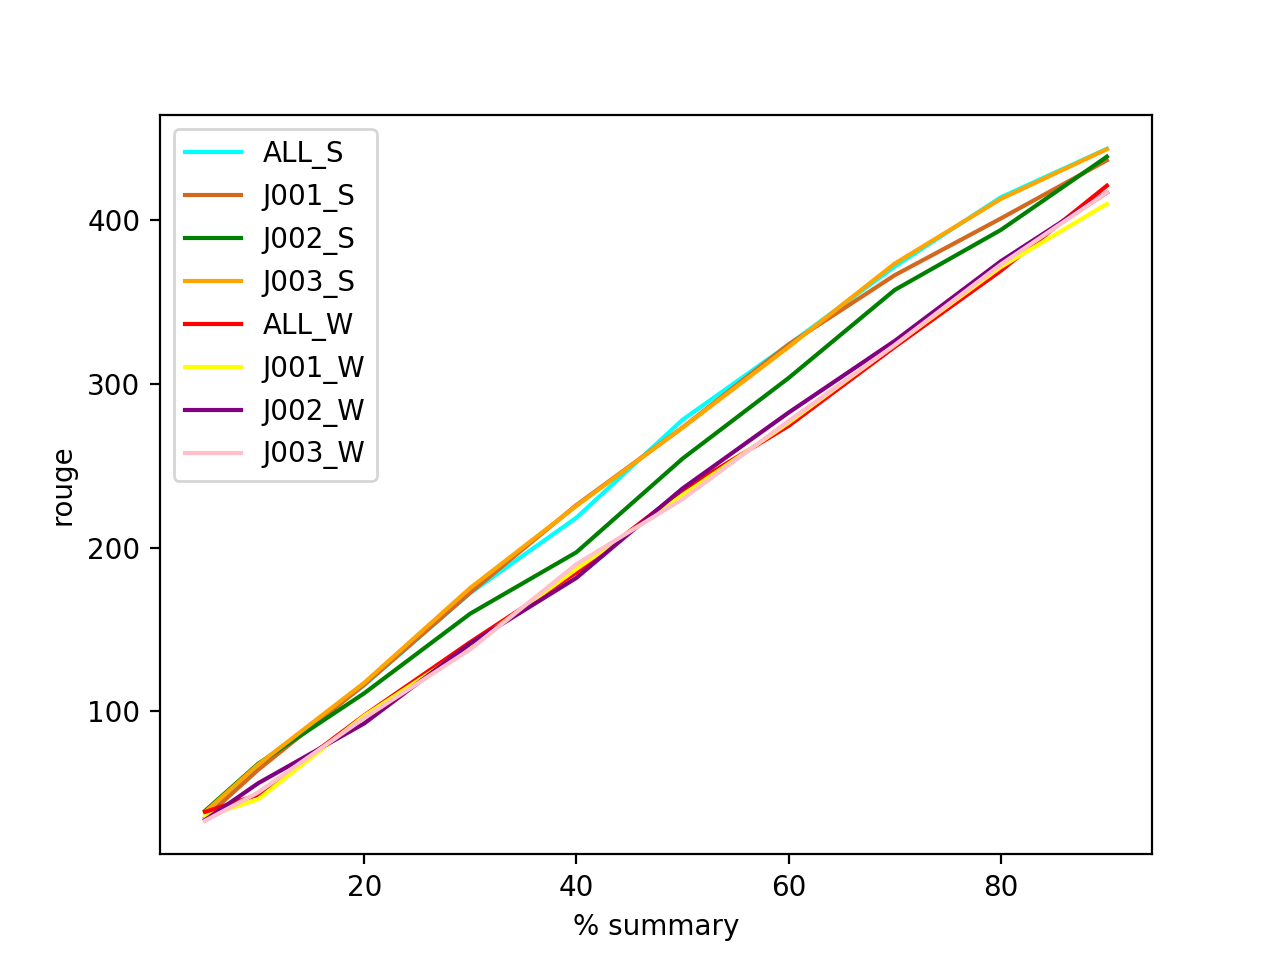

In [114]:
%matplotlib notebook
x=[5,10,20,30,40,50,60,70,80,90]
plt.figure()
plt.plot(x, split_y(y0), label ="ALL_S", color="#00FFFF")
plt.plot(x, split_y(y1), label ="J001_S", color="#D2691E")
plt.plot(x, split_y(y2), label ="J002_S", color="#008000")
plt.plot(x, split_y(y3), label ="J003_S", color="#FFA500")
plt.plot(x, split_y(y4), label ="ALL_W", color="#FF0000")
plt.plot(x, split_y(y5), label ="J001_W", color="#FFFF00")
plt.plot(x, split_y(y6), label ="J002_W", color="#800080")
plt.plot(x, split_y(y7), label ="J003_W", color="#FFC0CB")
# # plt.plot(x, y8show, label ="SWR", color="#000000")
plt.xlabel("% summary")
plt.ylabel("rouge")
plt.legend() 